In [28]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from work419 import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from work419 import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from dnn_app_utils_v2 import load_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [29]:
train_X, train_Y, test_X, test_Y = load_data()

y = 0.0


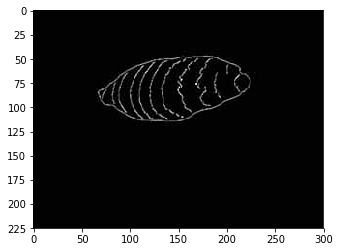

In [30]:
index = 112
plt.imshow(train_X[index])
print ("y = " + str(test_Y[0,index]))

In [31]:
train_x_flatten = train_X.reshape(train_X.shape[0], -1).T  
test_x_flatten = test_X.reshape(test_X.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_X = train_x_flatten/255.
test_X = test_x_flatten/255.

print ("train_x's shape: " + str(train_X.shape))
print ("test_x's shape: " + str(test_X.shape))

train_x's shape: (67500, 1488)
test_x's shape: (67500, 450)


In [32]:
layers_dims = [67500, 10, 7, 5, 1] #  5-layer model

In [33]:
def model(X, Y, learning_rate = 0.3, num_iterations = 1001, print_cost = True, lambd = 0, keep_prob = 1):
 
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,00)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6931708858003113
Cost after iteration 100: 0.6316876761834391
Cost after iteration 200: 0.5064624269754331
Cost after iteration 300: 0.08090020282075487
Cost after iteration 400: 0.03755213468235639
Cost after iteration 500: 0.027377839323341965
Cost after iteration 600: 0.023246153207430408
Cost after iteration 700: 0.021104343531351214
Cost after iteration 800: 0.01983623267392329
Cost after iteration 900: 0.019046750612248108
Cost after iteration 1000: 0.018489878137483328


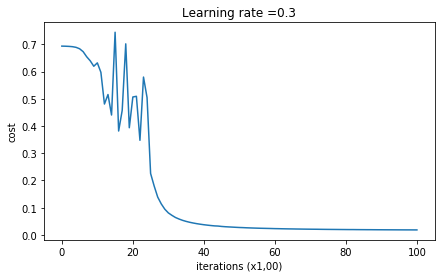

On the train set:
Accuracy: 0.9778225806451613
On the test set:
Accuracy: 0.6955555555555556


In [34]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Cost after iteration 0: 0.6931708858003113
Cost after iteration 100: 0.6903784362932932
Cost after iteration 200: 0.6563489813298917
Cost after iteration 300: 0.5006276311847162
Cost after iteration 400: 0.3732249397132003
Cost after iteration 500: 0.14221404036781693


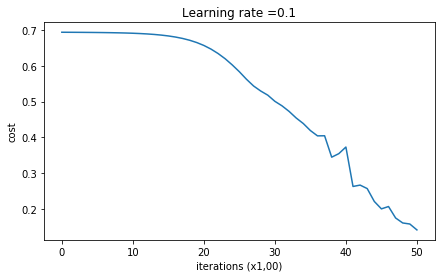

On the train set:
Accuracy: 0.9556451612903226
On the test set:
Accuracy: 0.6911111111111111


In [39]:
parameters = model(train_X, train_Y,learning_rate = 0.1, num_iterations = 501, keep_prob = 0.86)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Cost after iteration 0: 0.6931884688163943
Cost after iteration 100: 0.6924902938261674
Cost after iteration 200: 0.6904825781296863
Cost after iteration 300: 0.683054154515335
Cost after iteration 400: 0.6562445150513562
Cost after iteration 500: 0.5831412641632252
Cost after iteration 600: 0.46518473996109583
Cost after iteration 700: 0.3573081098649848
Cost after iteration 800: 0.25921546442530236
Cost after iteration 900: 0.1923850735531224
Cost after iteration 1000: 0.15324224173306533


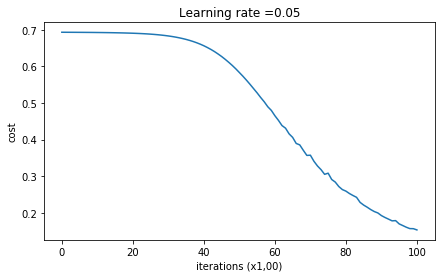

On the train set:
Accuracy: 0.9334677419354839
On the test set:
Accuracy: 0.6644444444444444


In [41]:
parameters = model(train_X, train_Y,learning_rate = 0.05, num_iterations = 1001, keep_prob = 0.76)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)